# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

Для данной лабораторной работы я использую набор данных индекса свободы человека по странам за 2018 год:

## Контекст

Центральная цель Индекса свободы человека заключается в том, чтобы нарисовать широкую, но достаточно точную картину масштабов общей свободы в мире. Более широкая цель состоит в том, чтобы более тщательно изучить, что мы подразумеваем под свободой, и лучше понять ее связь с любым количеством других социально-экономических явлений.

## Содержание

Индекс свободы человека измеряет экономические свободы, такие как свобода торговли или использования здоровых денег, и отражает степень, в которой люди свободны свободно пользоваться основными свободами, часто называемыми гражданскими свободами - свободой слова, религии, ассоциаций и собраний - в странах, участвующих в обзоре. Кроме того, он включает в себя показатели верховенства права, преступности и насилия, свободы передвижения и правовой дискриминации в отношении однополых отношений. Мы также включаем девять переменных, относящихся к свободам, специфичным для женщин, которые содержатся в различных категориях индекса.

Набор данных имеет следующие столбцы:

- year - год
- ISO_code - буквенное обозначение страны
- countries - страны
- region - регион
- pf_rol_procedural - процедурное правосудие
- pf_rol_civil - гражданская справедливость
- pf_rol_criminal - уголовное правосудие
- pf_rol - верховенство права
- pf_ss_homicide - убийству
- pf_ss_disappearances_disap - исчезновение
- ...

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Первичный анализ данных

In [17]:
# читаем данные набора
data = pd.read_csv('JupyterNotebooks/data/hfi_cc_2018.csv', sep=",")

In [18]:
data.shape

(1458, 123)

In [19]:
# типы данных столбцов
data.dtypes

year                   int64
ISO_code              object
countries             object
region                object
pf_rol_procedural    float64
                      ...   
ef_score             float64
ef_rank              float64
hf_score             float64
hf_rank              float64
hf_quartile          float64
Length: 123, dtype: object

In [21]:
# суммы пропусков по столбцам
data.isnull().sum()

year                   0
ISO_code               0
countries              0
region                 0
pf_rol_procedural    578
                    ... 
ef_score              80
ef_rank               80
hf_score              80
hf_rank               80
hf_quartile           80
Length: 123, dtype: int64

In [29]:
data.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


In [30]:
total_count = data.shape[0]

## Обработка пропусков значений в наборе данных 

Удалим те строки данных, в которых встречаются пустые столбцы:

In [22]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((1458, 123), (0, 123))

Итоговая сетка данных оказывается пустой, так как в каждой строке так или иначе встечаются пропуски данных.
В таком случае попробуем заполнить пустые значения например нулями.

In [26]:
# Заполнение всех пропущенных значений нулями
data_new_3 = data.fillna(0)
data_new_3.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,0.000000,0.000000,0.000000,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,0.000000,0.000000,0.000000,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,0.000000,0.000000,0.000000,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


Это не очень корректно, так как и категориальные данных заполняются нулями.
## Импьютация
### Обработка числовых данных

In [31]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка pf_rol_procedural. Тип данных float64. Количество пустых значений 578, 39.64%.
Колонка pf_rol_civil. Тип данных float64. Количество пустых значений 578, 39.64%.
Колонка pf_rol_criminal. Тип данных float64. Количество пустых значений 578, 39.64%.
Колонка pf_rol. Тип данных float64. Количество пустых значений 80, 5.49%.
Колонка pf_ss_homicide. Тип данных float64. Количество пустых значений 80, 5.49%.
Колонка pf_ss_disappearances_disap. Тип данных float64. Количество пустых значений 89, 6.1%.
Колонка pf_ss_disappearances_violent. Тип данных float64. Количество пустых значений 80, 5.49%.
Колонка pf_ss_disappearances_organized. Тип данных float64. Количество пустых значений 179, 12.28%.
Колонка pf_ss_disappearances_fatalities. Тип данных float64. Количество пустых значений 80, 5.49%.
Колонка pf_ss_disappearances_injuries. Тип данных float64. Количество пустых значений 80, 5.49%.
Колонка pf_ss_disappearances. Тип данных float64. Количество пустых значений 80, 5.49%.
Колонка pf_ss_wom

In [32]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,10.00000,10.00,10.000000,10.000000,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,NaN,NaN,NaN,3.819566,9.456254,10.0,9.29403,5.00,9.926119,9.990149,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,NaN,NaN,NaN,3.451814,8.060260,5.0,10.00000,7.50,10.000000,10.000000,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,10.00000,7.50,10.000000,9.990877,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,NaN,NaN,NaN,5.003205,8.808750,10.0,10.00000,7.50,9.316196,9.931620,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,3.000000,3.781688,2.369239,3.100000,0.000000,10.0,10.00000,10.00,9.988155,10.000000,...,2.784695,4.578318,0.315142,2.864160,4.666936,4.22,140.0,5.257879,136.0,4.0
1454,6.666667,4.349101,5.694847,5.600000,9.496239,5.0,10.00000,10.00,10.000000,10.000000,...,3.626593,7.306074,0.000000,4.574683,6.307577,6.19,103.0,6.420206,106.0,3.0
1455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,4.800000,4.578003,3.688652,4.400000,7.878084,10.0,10.00000,10.00,10.000000,10.000000,...,4.585391,5.124436,8.520369,6.681524,6.722175,7.15,57.0,6.647724,95.0,3.0


119 колонок из 123 являются численными и имеют пропуски данных.

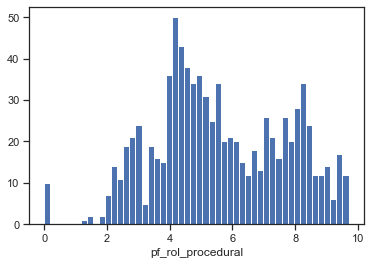

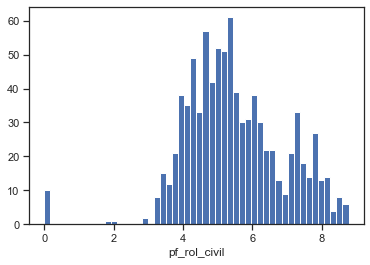

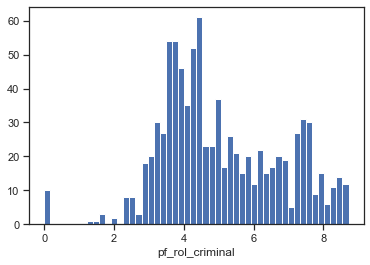

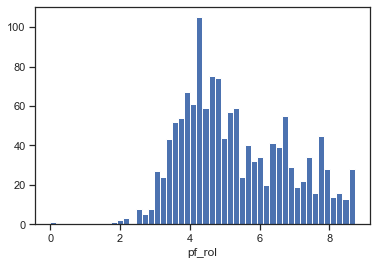

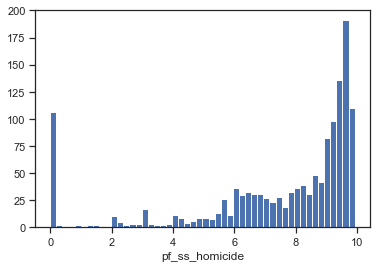

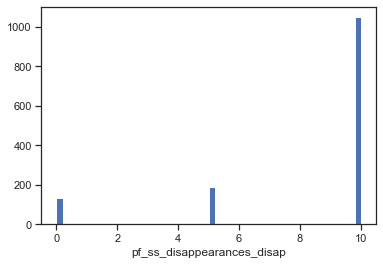

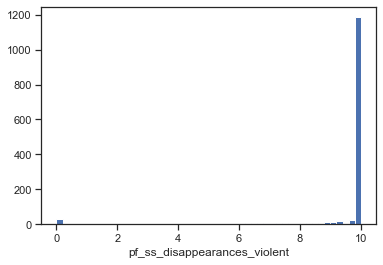

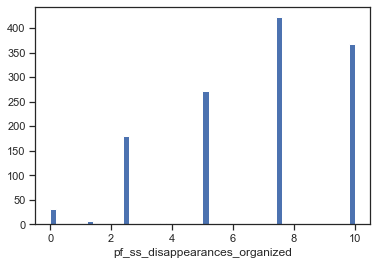

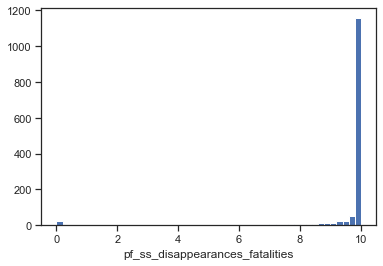

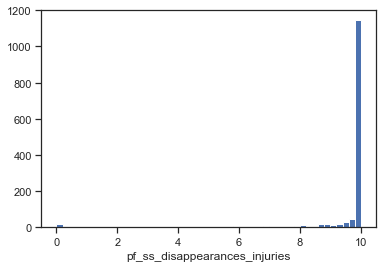

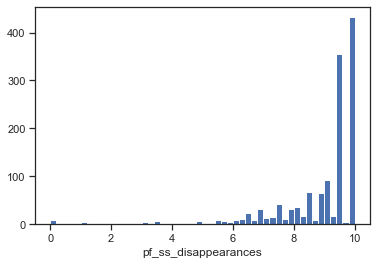

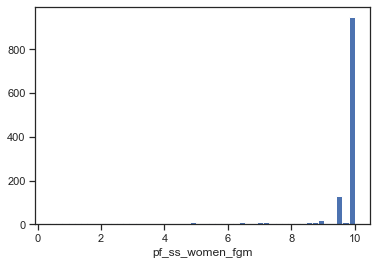

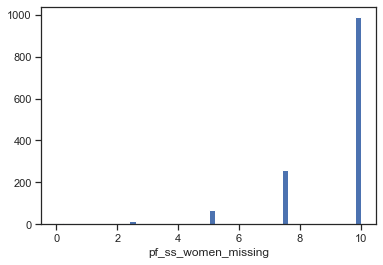

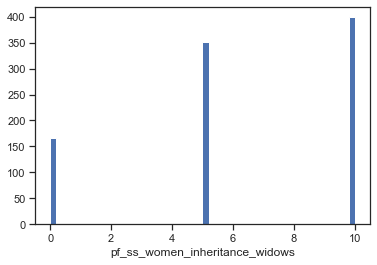

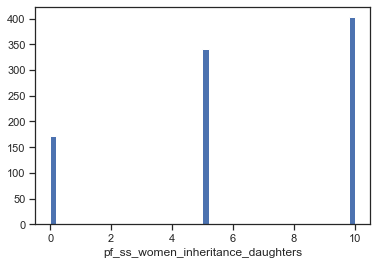

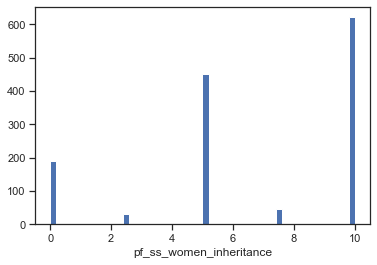

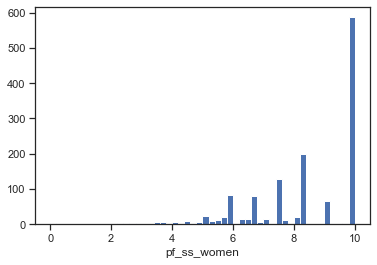

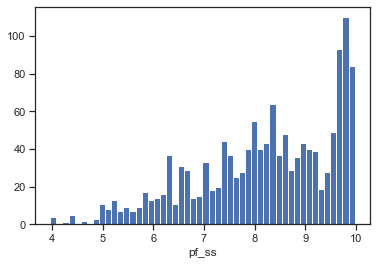

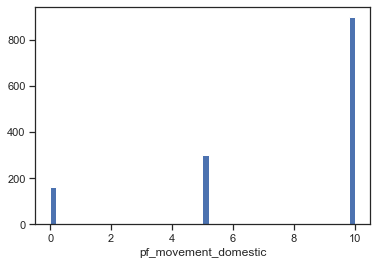

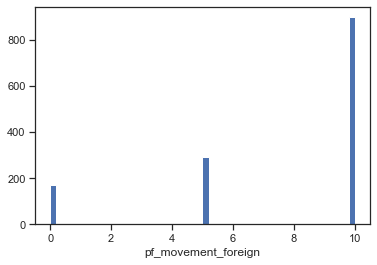

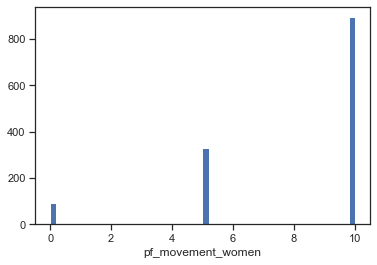

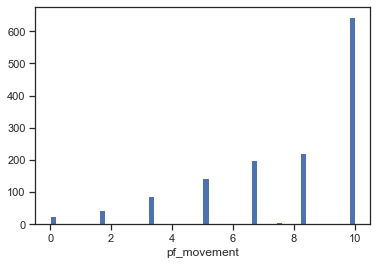

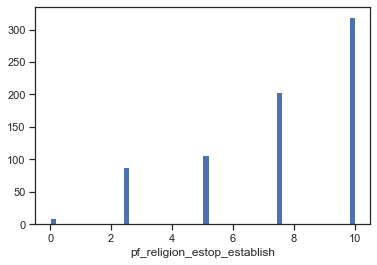

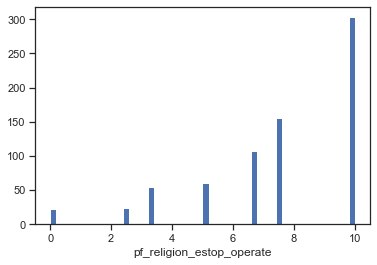

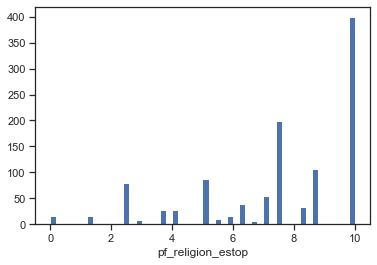

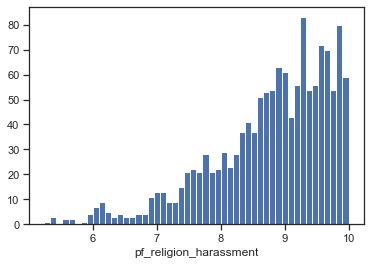

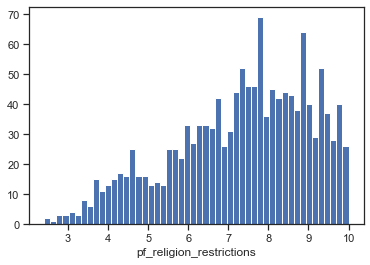

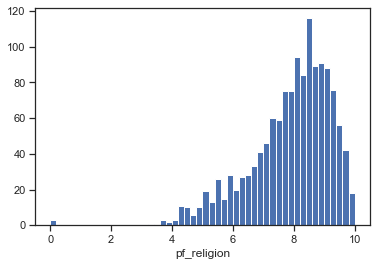

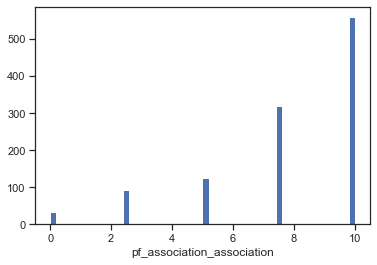

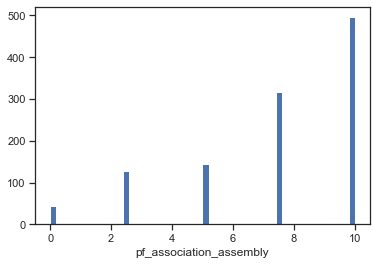

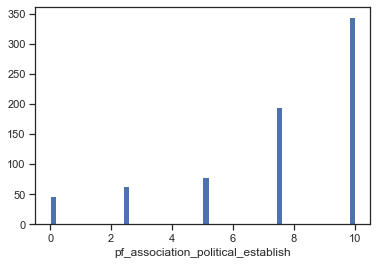

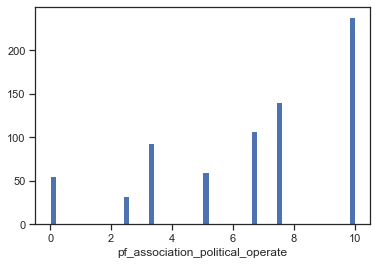

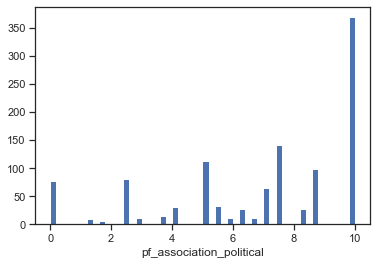

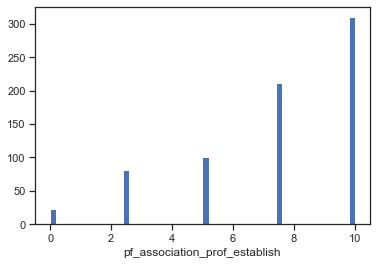

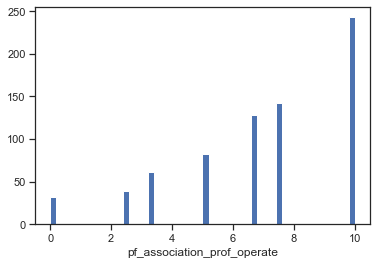

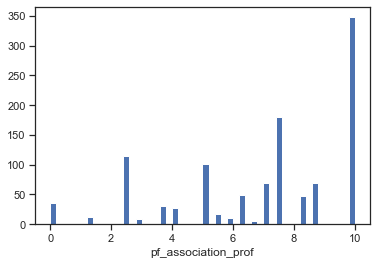

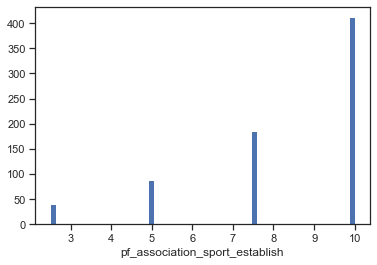

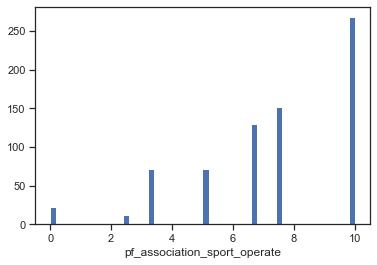

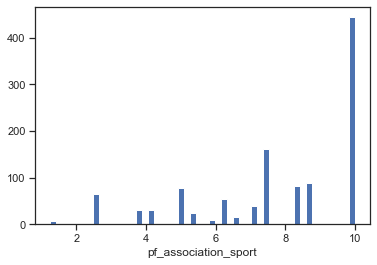

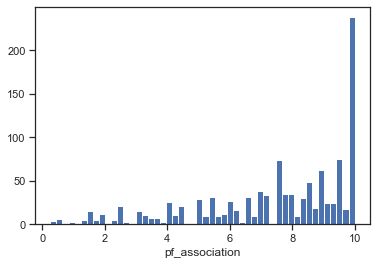

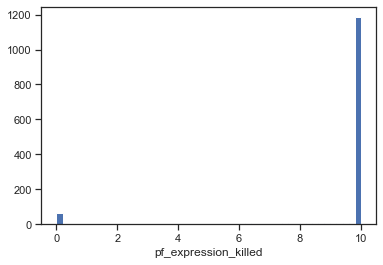

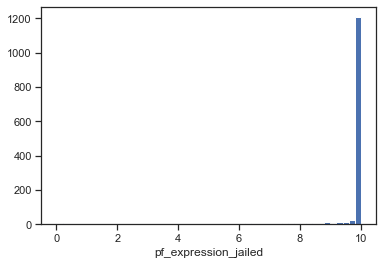

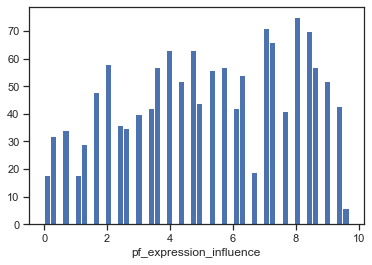

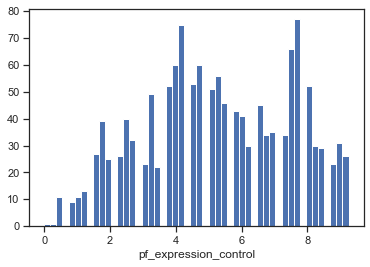

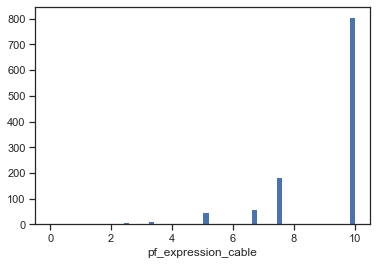

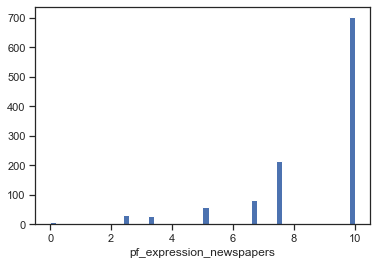

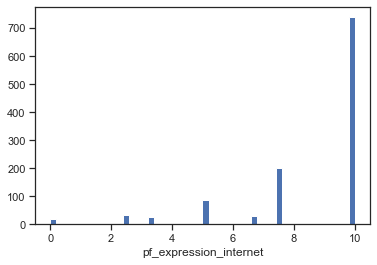

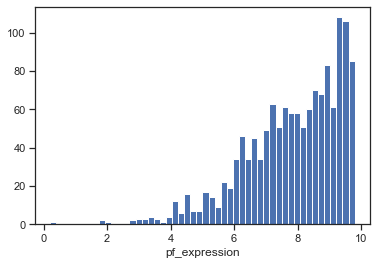

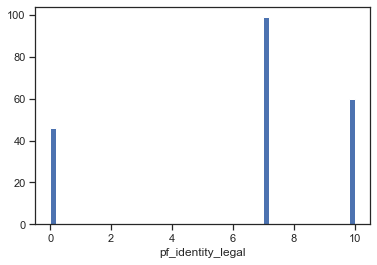

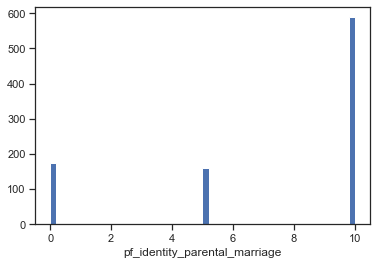

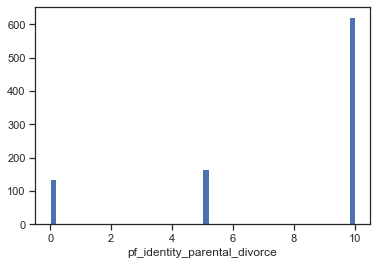

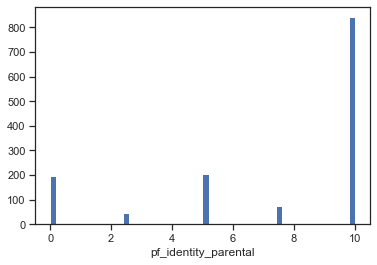

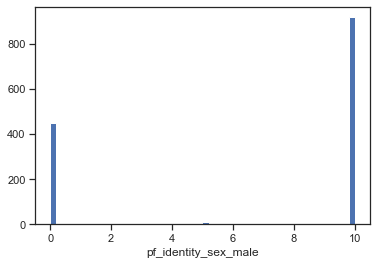

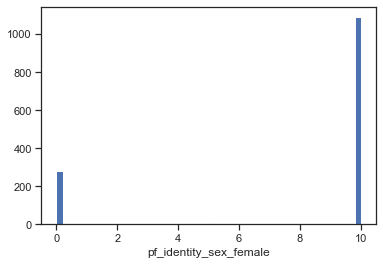

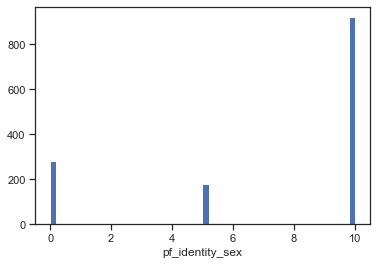

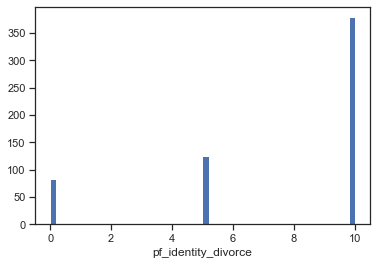

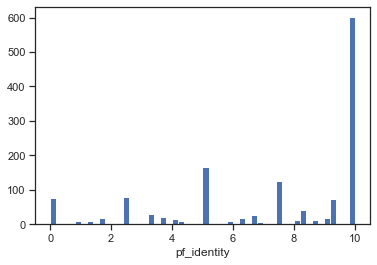

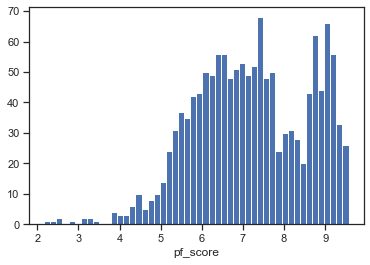

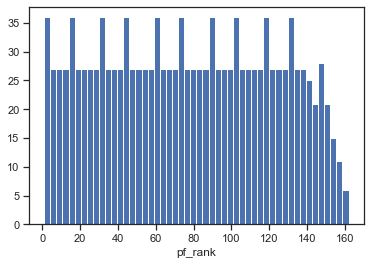

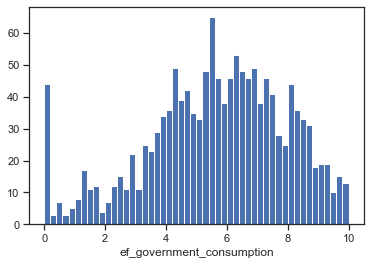

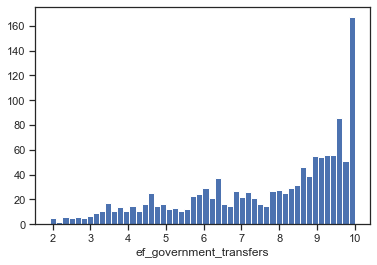

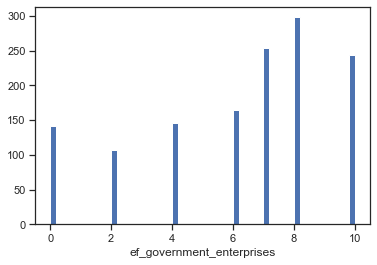

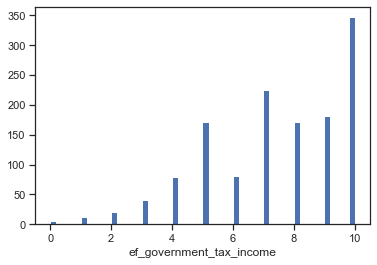

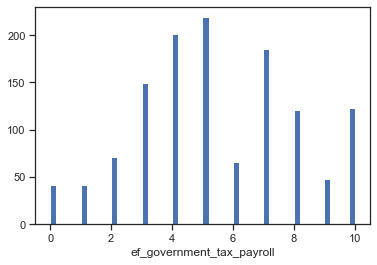

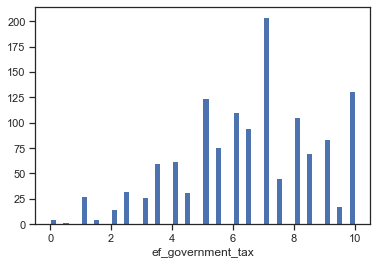

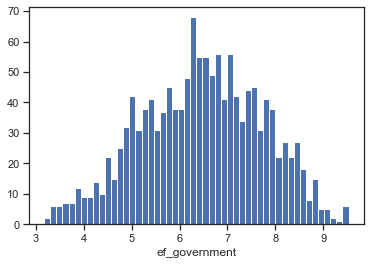

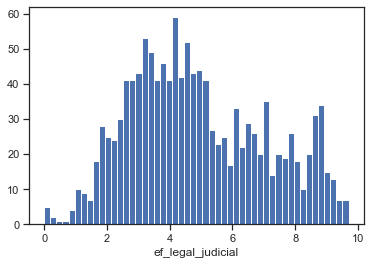

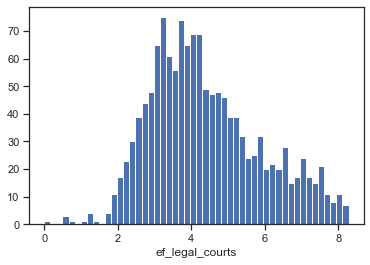

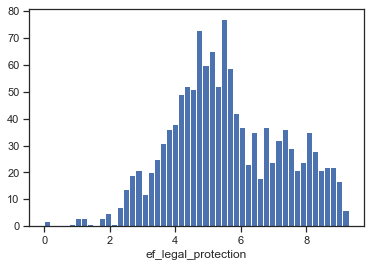

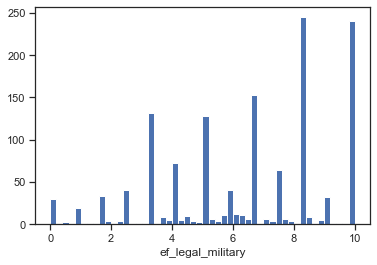

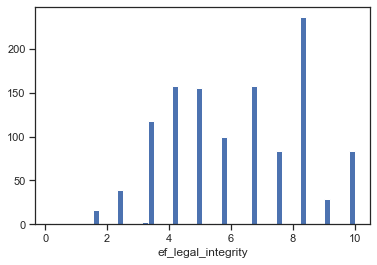

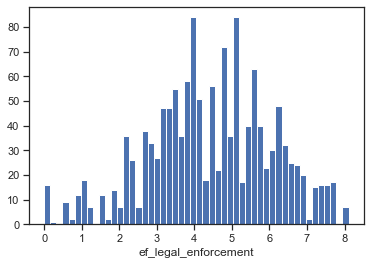

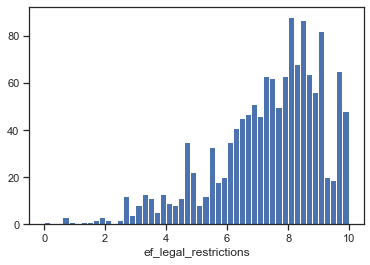

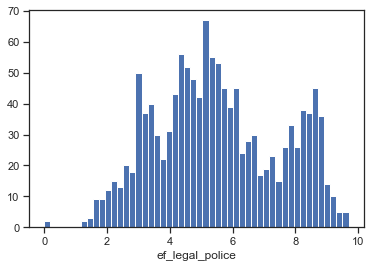

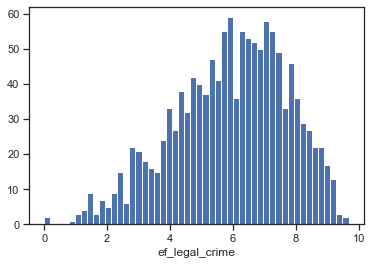

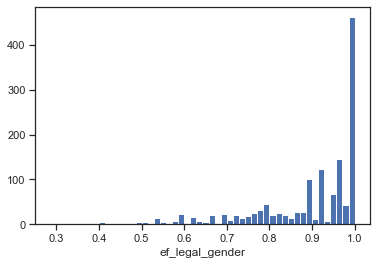

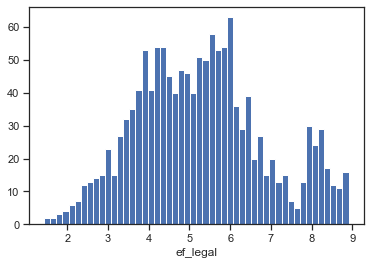

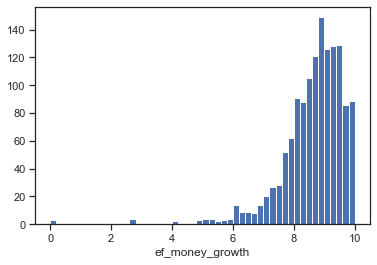

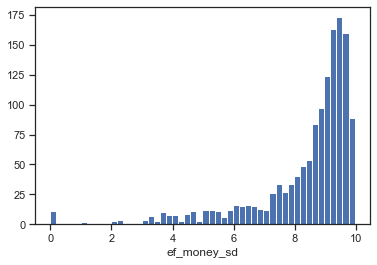

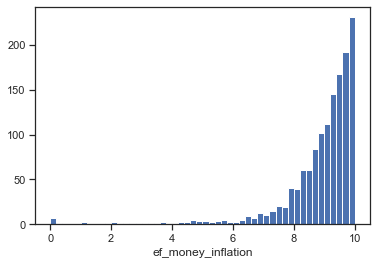

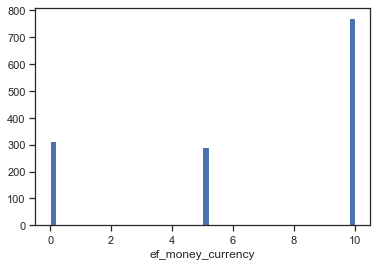

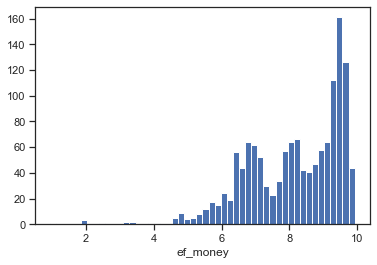

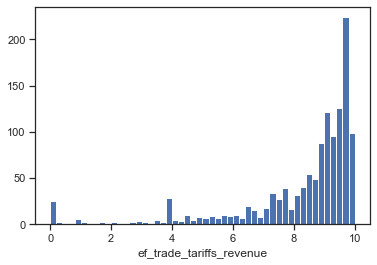

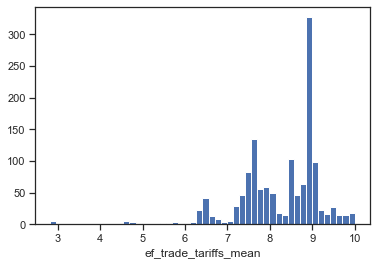

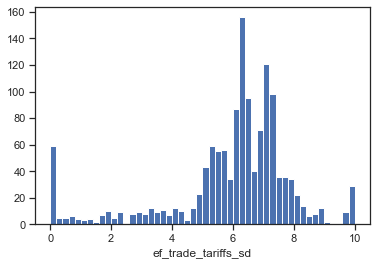

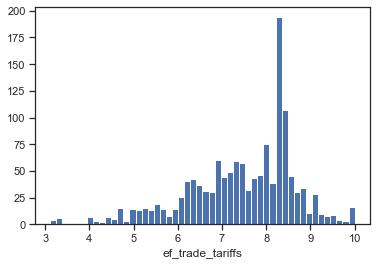

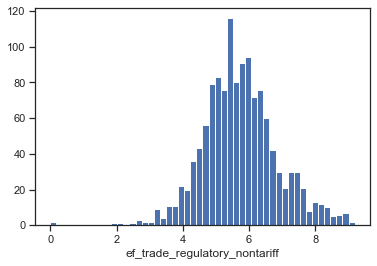

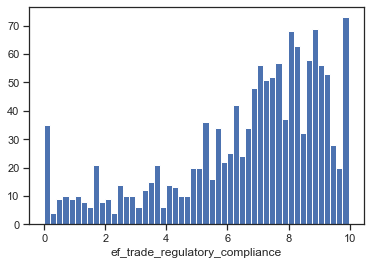

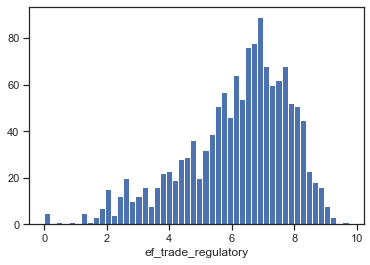

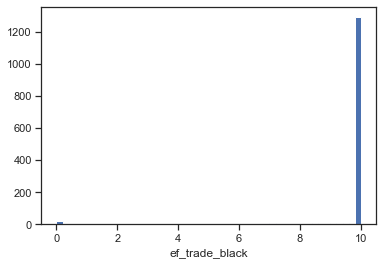

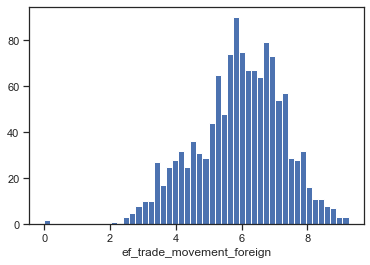

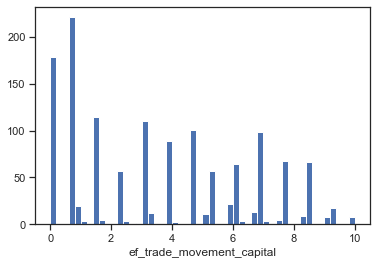

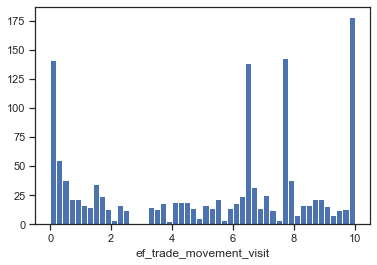

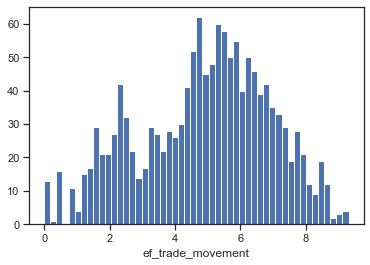

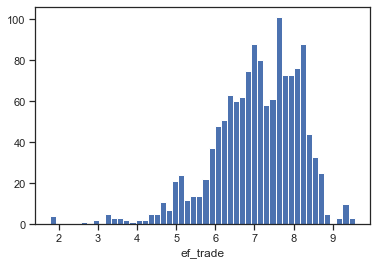

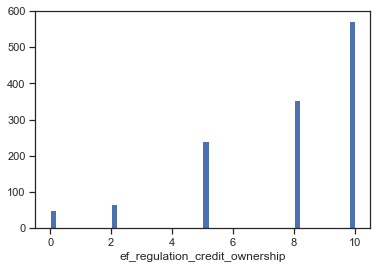

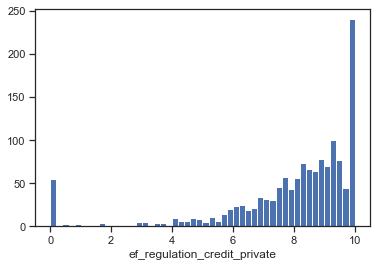

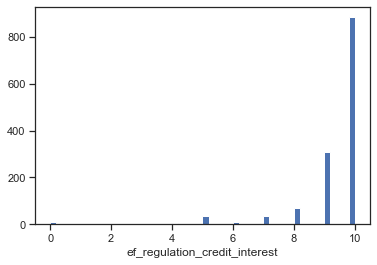

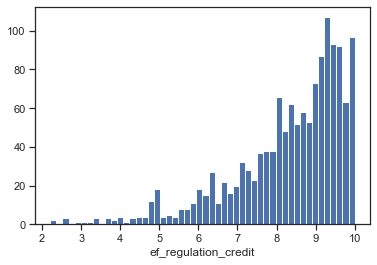

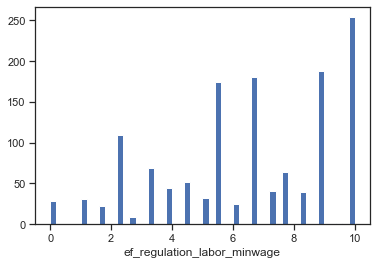

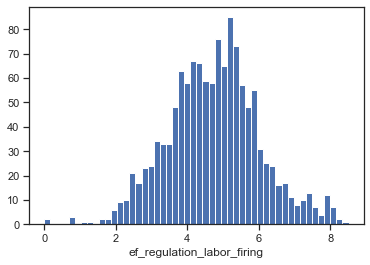

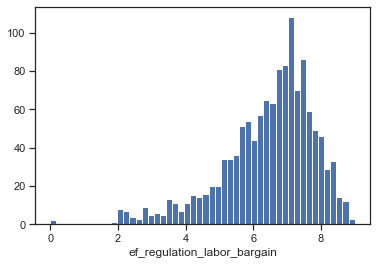

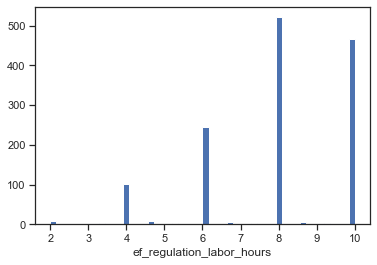

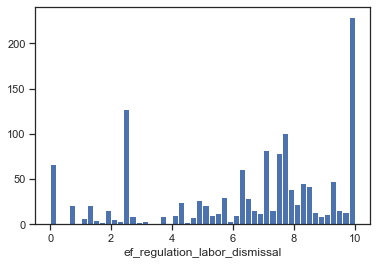

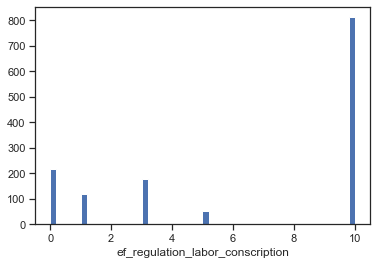

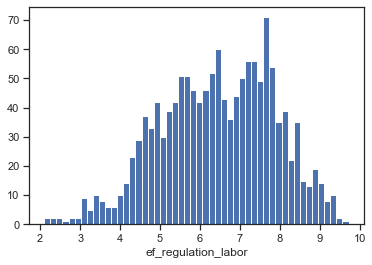

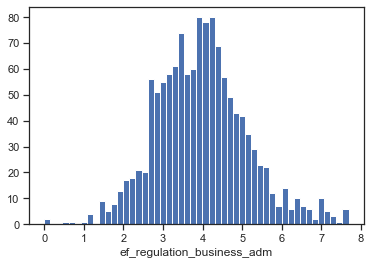

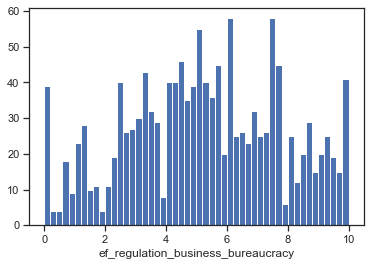

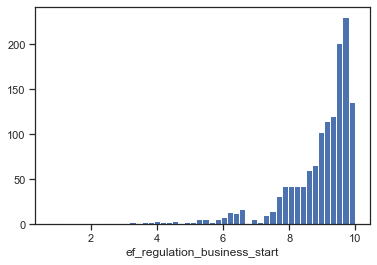

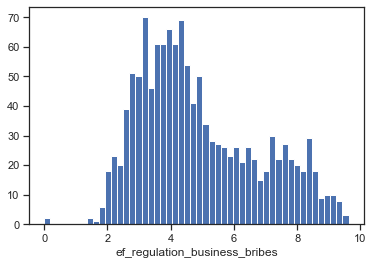

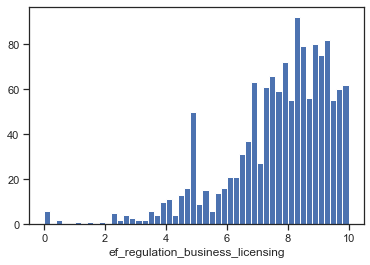

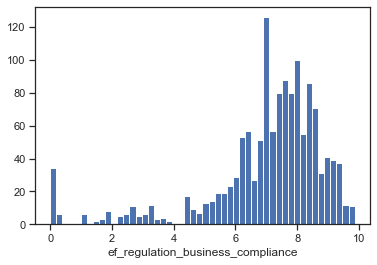

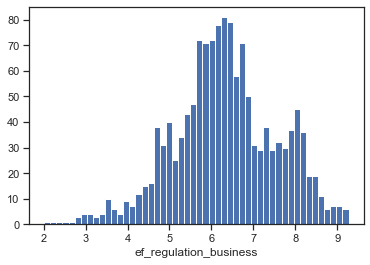

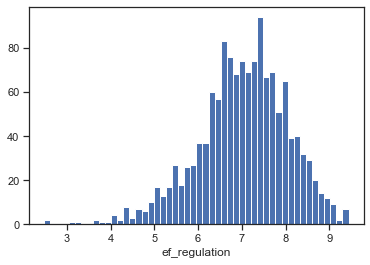

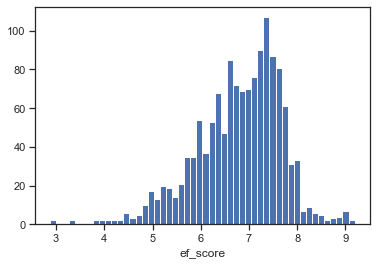

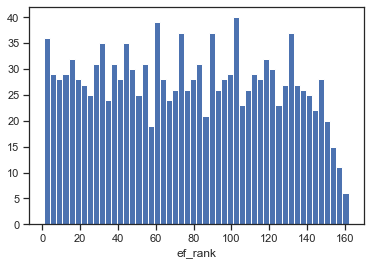

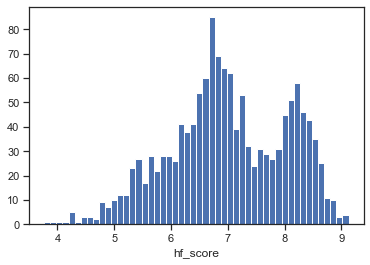

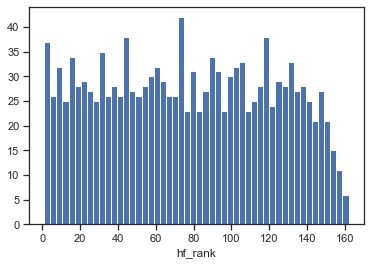

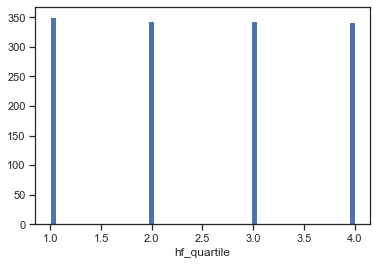

In [35]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

### Обработка категориальных данных

In [41]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))
if len(cat_cols) == 0:
    print("msg: Пропусков значений в категориальных данных не обнаруженно")

msg: Пропусков значений в категориальных данных не обнаруженно


Попробуем вручную удалить некоторые данные:

In [46]:
# читаем данные набора
data2 = pd.read_csv('JupyterNotebooks/data/hfi_cc_2018_3.csv', sep=",")

for col in data2.columns:
    # Количество пустых значений 
    temp_null_count = data2[data2[col].isnull()].shape[0]
    dt = str(data2[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))
if len(cat_cols) == 0:
    print("msg: Пропусков значений в категориальных данных не обнаруженно")

Колонка ISO_code. Тип данных object. Количество пустых значений 6, 0.41%.
Колонка region. Тип данных object. Количество пустых значений 2, 0.14%.


Именно в этом случае можно просто удалить строки с пропушенными данными: 

In [52]:
cat_cols_set = set(cat_cols)
cat_cols_set

{'ISO_code', 'region'}

In [62]:
# Удаление строк, содержащих пустые категориальные значения
for col in cat_cols_set:
    data2_new = data2[data2[col].notna()]
(data2.shape, data2_new.shape)

((1458, 123), (1452, 123))

В случае взятого мною набора данных такой способ более подходит: просто выбираем признаки которые в далнейшем хотим отследить, проверить зависимости и тп, и удаляем строки, у которых у этих признаков значения не установленны.

## Масштабирование данных
Термины "масштабирование" и "нормализация" часто используются как синонимы. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины.

In [63]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

### Масштабирование МиниМакс

In [76]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data2[['pf_rol_criminal']])

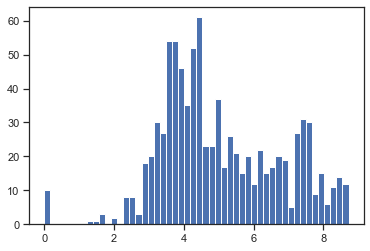

In [65]:
plt.hist(data2['pf_rol_criminal'], 50)
plt.show()

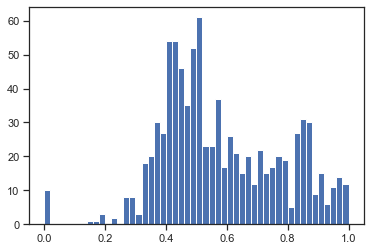

In [75]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование на основе Z-оценки

In [77]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data2[['pf_rol_criminal']])

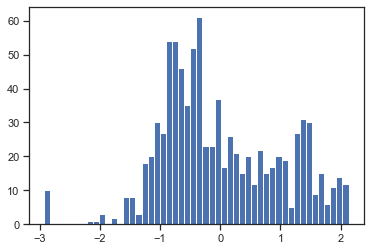

In [78]:
plt.hist(sc2_data, 50)
plt.show()